In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

In [2]:
problem_names = {
    "sinus1d": "1D Sinusoidal",
    "sinus2d": "2D Sinusoidal",
    "sinus3d": "3D Sinusoidal",
    "gauss1d": "1D Gaussian",
    #'gauss2d': "2D Gaussian",
    #'gauss3d': "3D Gaussian"
}

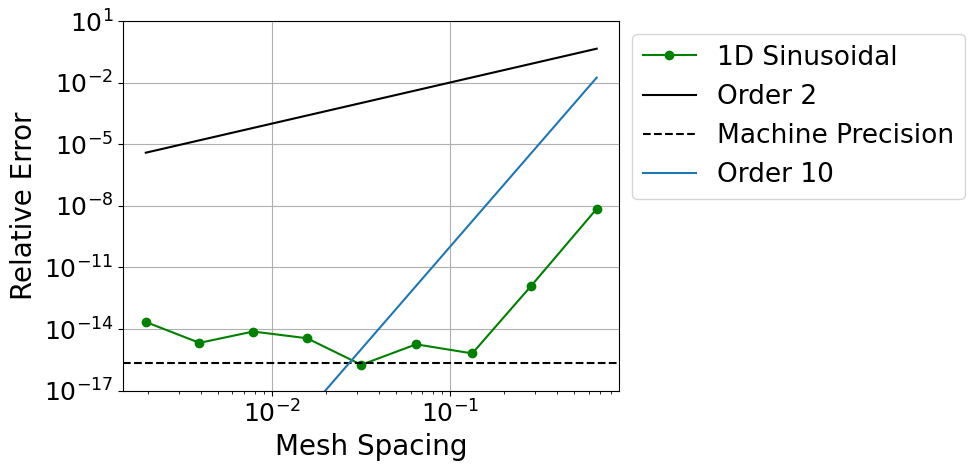

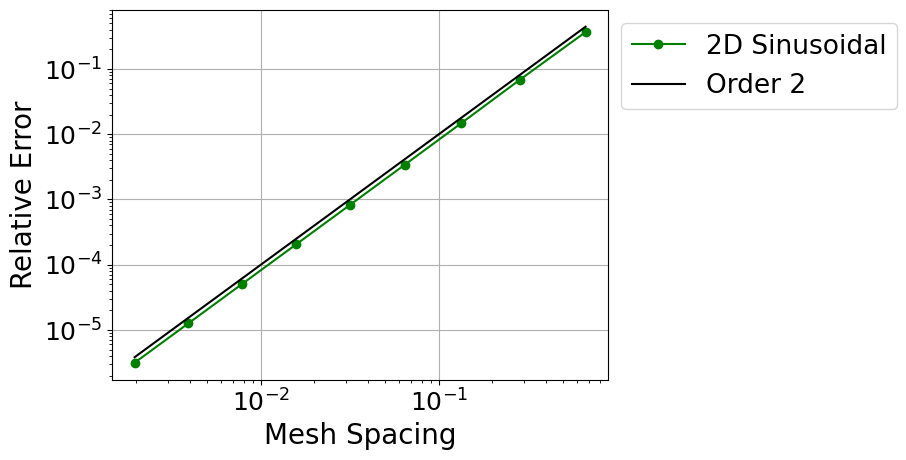

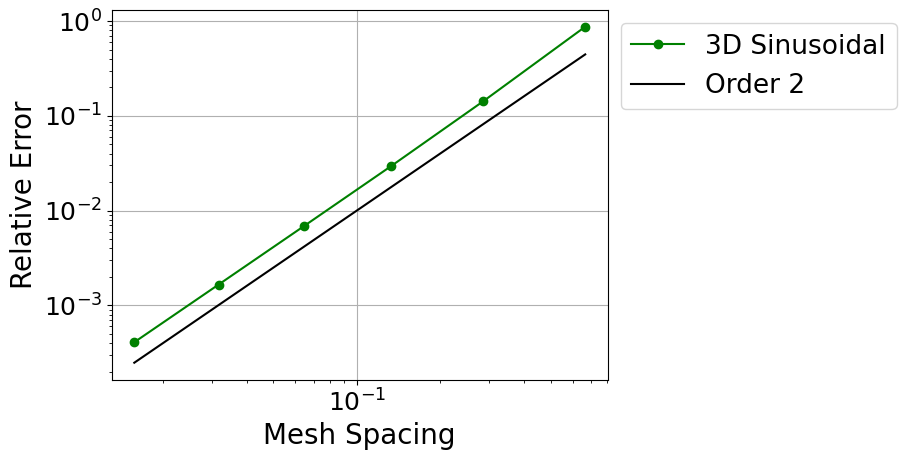

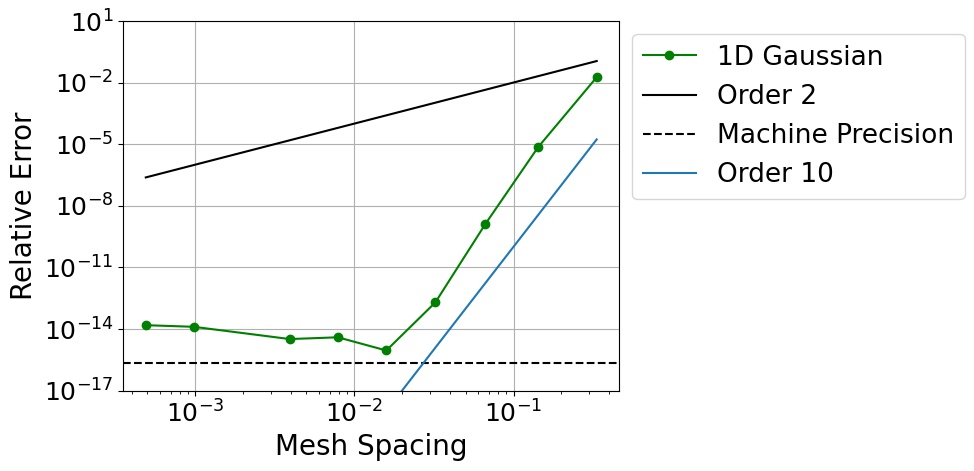

In [3]:
for key, value in problem_names.items():
    problem_df = pd.read_csv(f"{key}.dat", sep = '\s{2,}', engine='python')
    problem_df = problem_df.iloc[:,1:]

    problem_h_squared = problem_df['Spacing']**2
    problem_order = problem_df['Spacing']**10

    machine_precision = 2.2204460492503131e-16

    plt.loglog(problem_df['Spacing'], problem_df['Relative Error'], '-', marker='o', markersize=6, color='green')
    plt.loglog(problem_df['Spacing'], problem_h_squared, 'k-')

    if key == 'sinus1d' or key == 'gauss1d':
        # Plot a horizontal line at the machine precision
        plt.axhline(y=machine_precision, color='k', linestyle='--')
        plt.loglog(problem_df['Spacing'], problem_order, '-')
        plt.ylim([1e-17, 1e1])

    plt.xlabel('Mesh Spacing', fontsize=20)
    plt.ylabel('Relative Error', fontsize=20)
    plt.legend([value, 'Order 2', 'Machine Precision', 'Order 10'], fontsize=19, bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid()
    plt.savefig(f'./fem_convergence_{key}.png', dpi=200, bbox_inches="tight")
    plt.show()